In [1]:
# Q1 
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
x = np.array([-2.23, -1.30, -0.42, 0.30, 0.33, 0.52, 0.87, 1.80, 2.74, 3.62])
y = np.array([1.01, 0.69, -0.66, -1.34, -1.75, -0.98, 0.25, 1.57, 1.65, 1.51])

In [4]:
# Feature map, sends k dimensional feature vector to k+1 dimensional feature vector
def x_k(x,k):
  x_k_L = []
  for i in range(len(x)):
    temp=[]
    for j in range(k+1):
      temp.append(x[i]**j)
    x_k_L.append(temp)
  return x_k_L

In [5]:
beta = 4
lamb = 1 #lambda = 1 (lambda*I_D)

In [6]:
def m_v(x_k):
  d = x_k.shape[1]
  mean = np.matmul( np.matmul(np.linalg.inv(np.matmul(x_k.T,x_k) + (lamb/beta)*np.eye(d)),x_k.T), y)
  var = np. linalg. inv(beta*np.matmul(x_k.T,x_k) + lamb*np.eye(d))
  return mean, var

In [24]:
def plot_fn(x_k):
  x1 = np.arange(-4,4,0.1)
  mean, var = m_v(x_k)
  k =  x_k.shape[1]
  for i in range(10):
    r = np.random.multivariate_normal(mean, var)
    plt.xlim(-4,4)
    plt.ylim(-5,5)
    s = "k = " + str(k-1)
    plt.title(s)
    y1 = sum([r[i]*(x1**i) for i in range(k)])
    plt.plot(x1, y1, 'r')
  plt.scatter(x,y)
  plt.xlabel("x")
  plt.ylabel("y")
  plt.show()


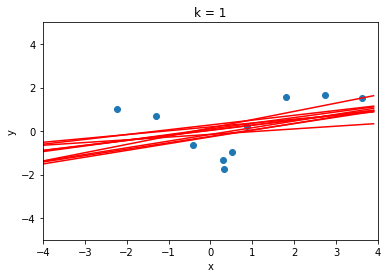

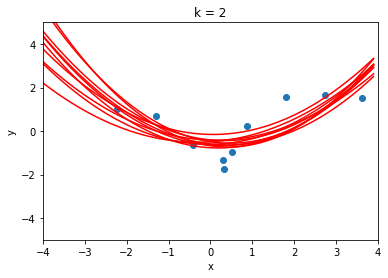

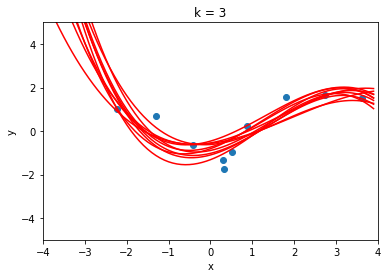

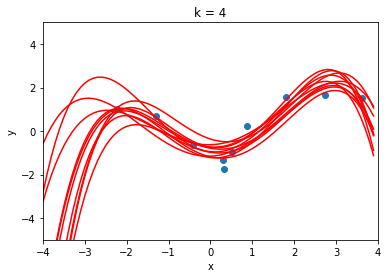

In [25]:
# when k=1, features become two dimensional
for k in range(1,5):
  x_k_temp = x_k(x,k)
  x_k_L = np.array(x_k_temp)  
  plot_fn(x_k_L)

In [18]:
# Q2 
def plot_m_v_fn(x, k):
  x_k_temp = x_k(x,k)
  x_k_L = np.array(x_k_temp)
  x1 = np.arange(-4,4,0.1)
  mean, var = m_v(x_k_L)
  plt.xlim(-4,4)
  plt.ylim(-5,5)
  s = "k = " + str(k)
  plt.title(s)
  i = np.arange(-4,4,0.1)
  m = []  #mean
  sd1 = []  #standard deviation +
  sd2 = []  #standard deviation -
  for x in i:
    comp = np.array(x_k(list([x]),k)).reshape(k+1,1)
    m.append(np.matmul(mean.T,comp))
    sd1.append(np.matmul(mean.T,comp) + 2*((1/beta) + np.matmul(np.matmul(comp.T,var),comp)).reshape(1,))
    sd2.append(np.matmul(mean.T,comp) - 2*((1/beta) + np.matmul(np.matmul(comp.T,var),comp)).reshape(1,))
  plt.plot(i,m,'r')
  plt.plot(i,sd1 ,'b')
  plt.plot(i,sd2 ,'b')
  plt.xlabel("x")
  plt.ylabel("y")
  plt.show()


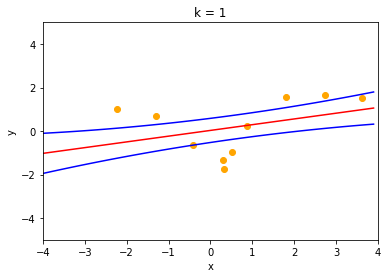

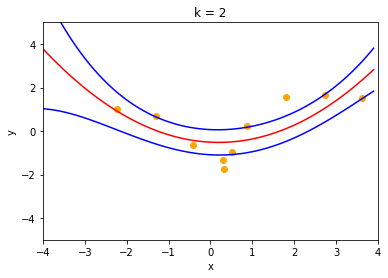

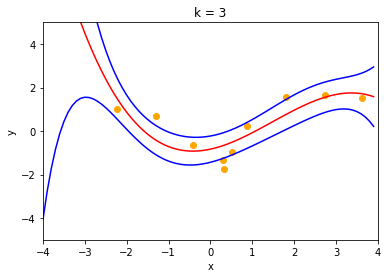

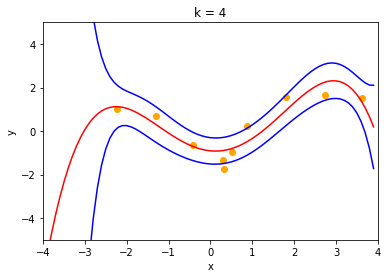

In [19]:
x = np.array([-2.23, -1.30, -0.42, 0.30, 0.33, 0.52, 0.87, 1.80, 2.74, 3.62])
y = np.array([1.01, 0.69, -0.66, -1.34, -1.75, -0.98, 0.25, 1.57, 1.65, 1.51])
for k in range(1,5): 
  plt.scatter(x,y,color = 'orange')
  plt.ylim(-5,5)
  plot_m_v_fn(x,k)

In [11]:
#Q3 
from scipy.stats import multivariate_normal

In [14]:
print("Marginal likelihoood values:")
for k in range(1,5):
    x_l = np.array(x_k(x, k))
    var = (1/beta)*np.eye(10)+ np.matmul(x_l,x_l.T)
    ML = np.log(multivariate_normal.pdf(y, np.zeros(10), var))
    print("For k =",k, " Value = ",ML)
     

Marginal likelihoood values:
For k = 1  Value =  -32.352015280445244
For k = 2  Value =  -22.77215317878222
For k = 3  Value =  -22.079070642234182
For k = 4  Value =  -22.386776180355803


In [15]:
#Q4
print("Likelihood values:")
for k in range(1,5):
    x_l = np.array(x_k(x, k))
    mean = x_l@np.linalg.inv(x_l.T@x_l+(1/beta)*np.eye(k+1))@(x_l.T@y)
    var = 1/beta*np.eye(10)
    val = np.log(multivariate_normal.pdf(y, mean, var))
    print("For k = ",k," Value = ",val)

Likelihood values:
For k =  1  Value =  -28.09400437907555
For k =  2  Value =  -15.360663659052214
For k =  3  Value =  -10.935846883615742
For k =  4  Value =  -7.225291259028545
